# Pruebas Stirling



In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
class Particle:
    def __init__(self, x, y, vx, vy, Fx=0, Fy=0, Dvx=0, Dvy=0, c_x=0, W=0):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.Fx = Fx
        self.Fy = Fy
        self.Dvx = Dvx
        self.Dvy = Dvy
        self.c_x = c_x
        self.W = W

    def reset_F(self):
        self.Fx = 0
        self.Fy = 0

    def add_F(self, Fx, Fy):
        self.Fx += Fx
        self.Fy += Fy

In [3]:
class lf_integrator:
    def __init__(self, dti, fi, Ti):
        self.dt = dti
        self.f = fi
        self.T = Ti
        self.bonded = False

    def initialize_v(self, particles):
        for p in particles:
            p.vx += 0.5 * self.dt * p.Fx
            p.vy += 0.5 * self.dt * p.Fy

    def update_F(self, particles, k):
        for p in particles:
            p.reset_F()
            F = -k * (p.x - p.c_x)
            p.add_F(F, 0)

    def update_v1(self, particles):
        for p in particles:
            p.vx += self.dt * p.Fx
            p.vy += self.dt * p.Fy

    def impulse_Dv(self, particles):
        for p in particles:
            eta = np.random.normal(0, 1)
            p.Dvx = -self.f * p.vx + math.sqrt(self.f * (2 - self.f) * self.T) * eta

    def update_x(self, particles, k):
        for p in particles:
            dx = self.dt * (p.vx + 0.5 * p.Dvx)
            dy = self.dt * (p.vy + 0.5 * p.Dvy)
            p.x += dx
            p.y += dy
            p.W += -k * (p.x - p.c_x) * dx

    def update_v2(self, particles):
        for p in particles:
            p.vx += p.Dvx
            p.vy += p.Dvy

----------------------------------------------------------------

# paso 0: sin fuerzas

In [4]:
dt = 0.01
gamma= 0.5
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0
num_particles = 2000  # Cambiado a 100 partículas
total_steps = int(700 / dt)  # Cambiado a 200 segundos

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

time_values = np.arange(total_steps) * dt


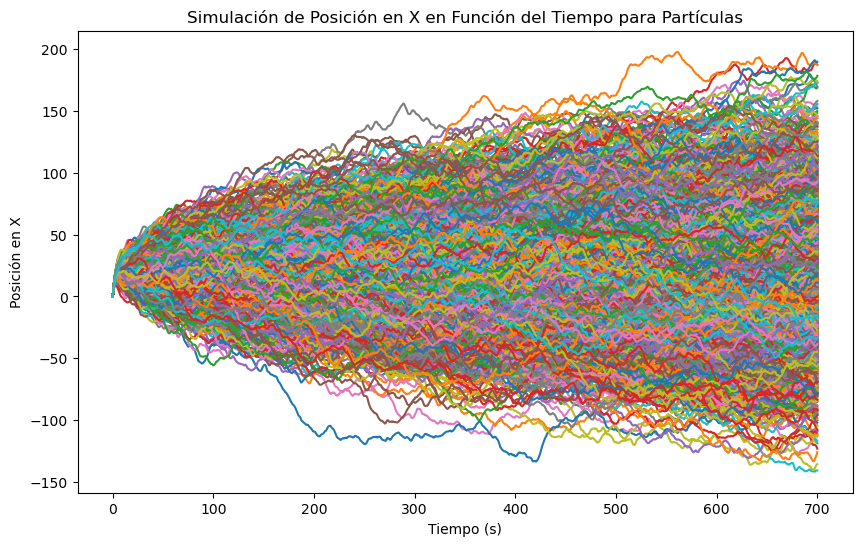

In [6]:
# Gráfico de posición en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, positions_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en X')
plt.title('Simulación de Posición en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

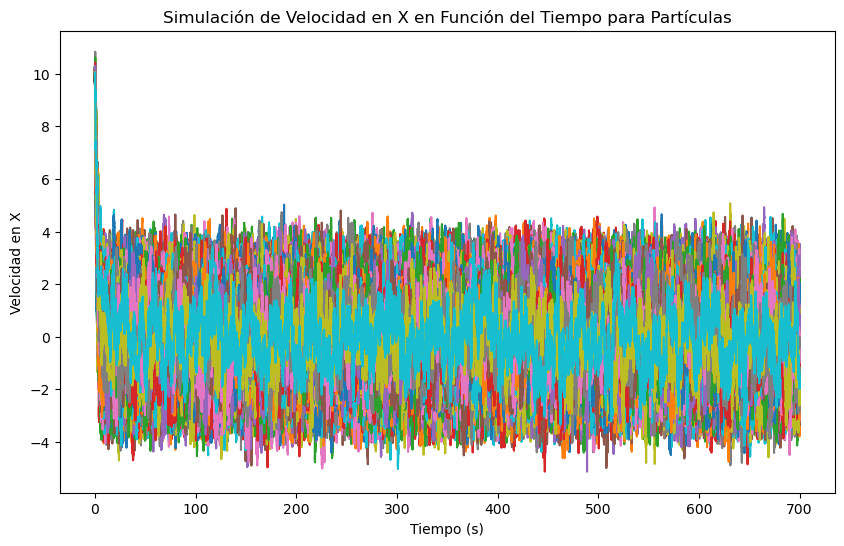

In [7]:
# Gráfico de velocidad en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, velocities_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad en X')
plt.title('Simulación de Velocidad en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

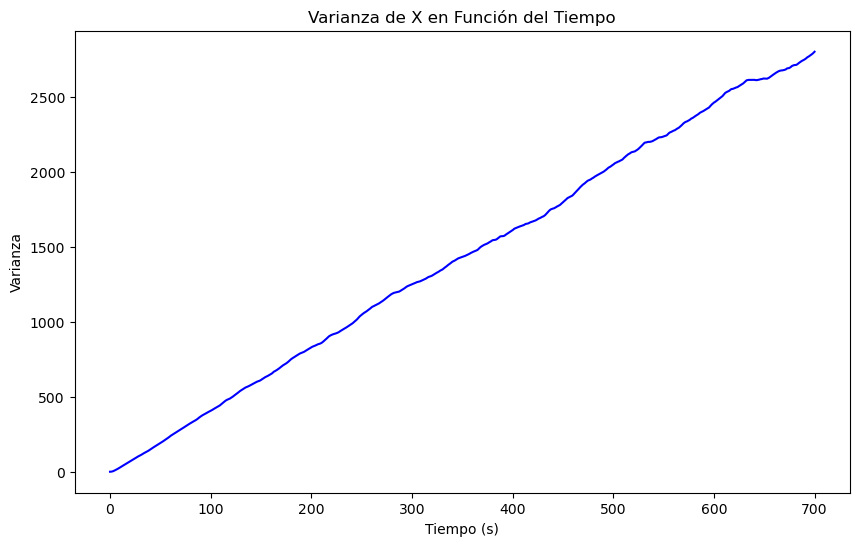

In [8]:
variances_x = np.var(positions_x, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(time_values, variances_x, color='blue')
plt.title('Varianza de X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza')
plt.show()

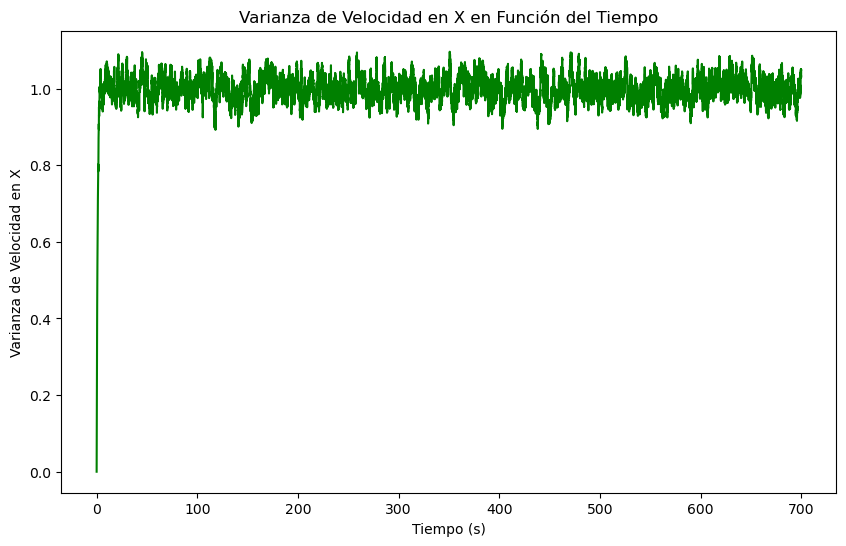

In [9]:
variances_vx = np.var(velocities_x, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(time_values, variances_vx, color='green')
plt.title('Varianza de Velocidad en X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza de Velocidad en X')
plt.show()

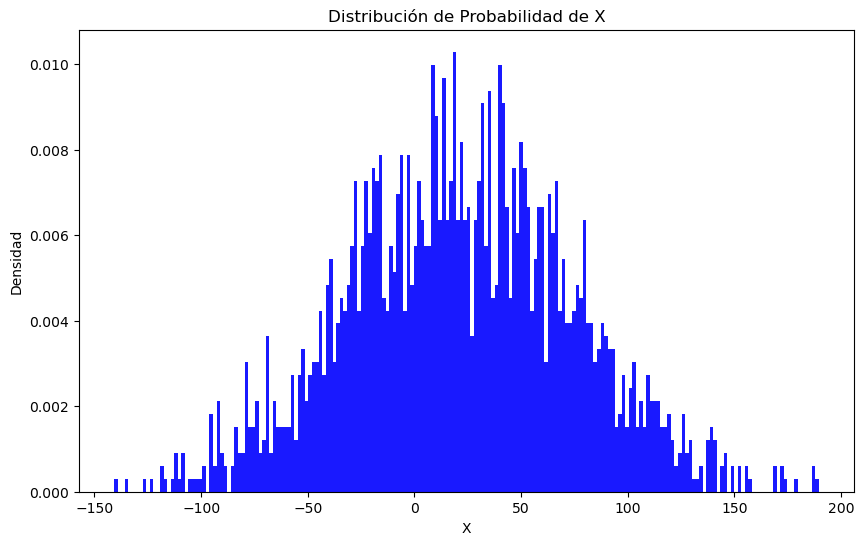

In [12]:
x_values = positions_x[:, -1]
plt.figure(figsize=(10, 6))
plt.hist(x_values, bins=200, density=True, alpha=0.9, color='blue')
plt.title('Distribución de Probabilidad de X')
plt.xlabel('X')
plt.ylabel('Densidad')
plt.show()

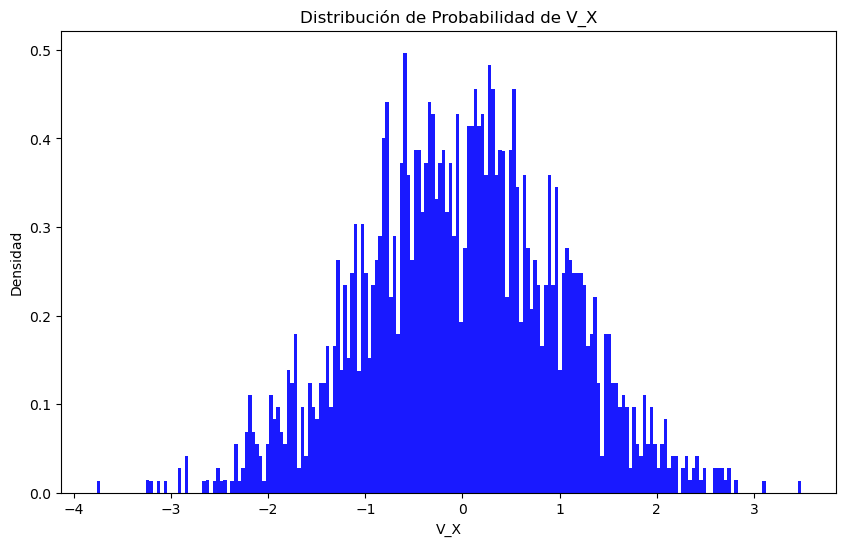

In [11]:
vx_values = velocities_x[:, -1]
plt.figure(figsize=(10, 6))
plt.hist(vx_values, bins=200, density=True, alpha=0.9, color='blue')
plt.title('Distribución de Probabilidad de V_X')
plt.xlabel('V_X')
plt.ylabel('Densidad')
plt.show()

-------------------------------------------------------------------------------------------------

# Paso 1: constante diferente de cero

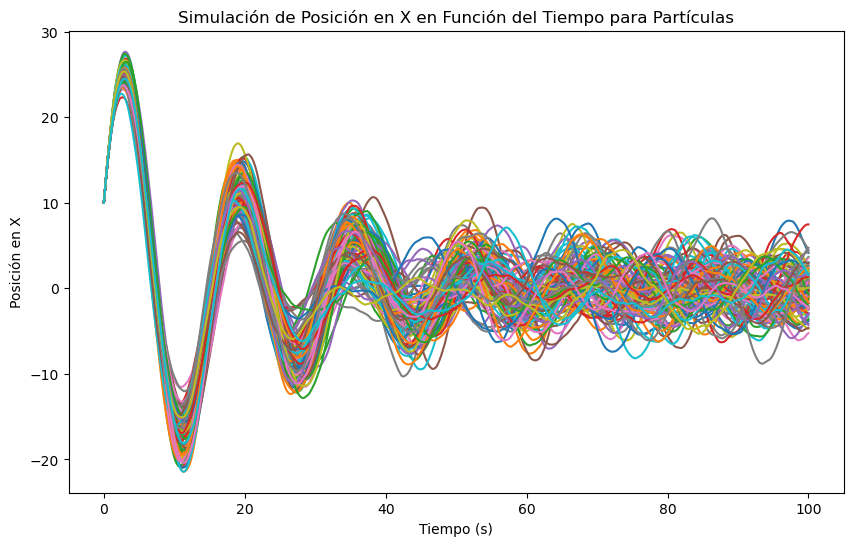

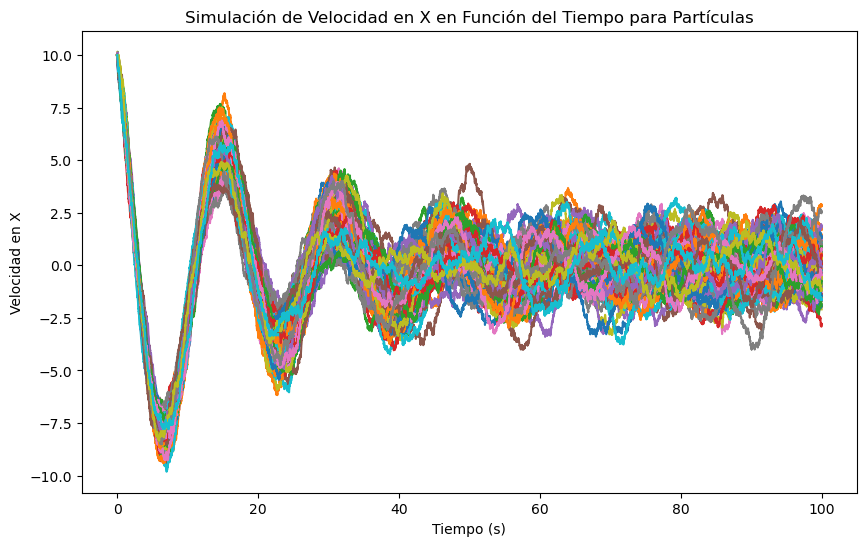

In [5]:
dt = 0.01
gamma= 0.1
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0.1
num_particles = 100  # Cambiado a 100 partículas
total_steps = int(100 / dt)  # Cambiado a 200 segundos

# Inicializar partículas
particles = [Particle(x=10, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Graficar resultados
time_values = np.arange(total_steps) * dt

# Gráfico de posición en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, positions_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en X')
plt.title('Simulación de Posición en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

# Gráfico de velocidad en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, velocities_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad en X')
plt.title('Simulación de Velocidad en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()


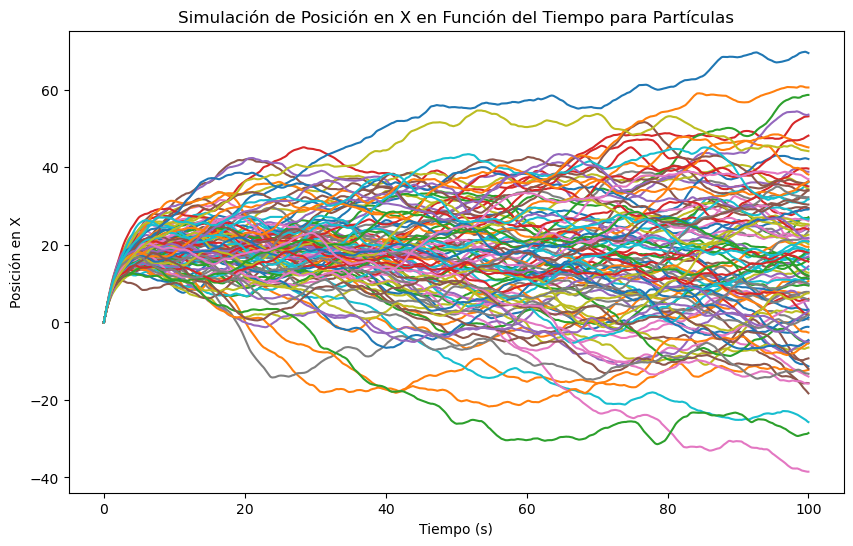

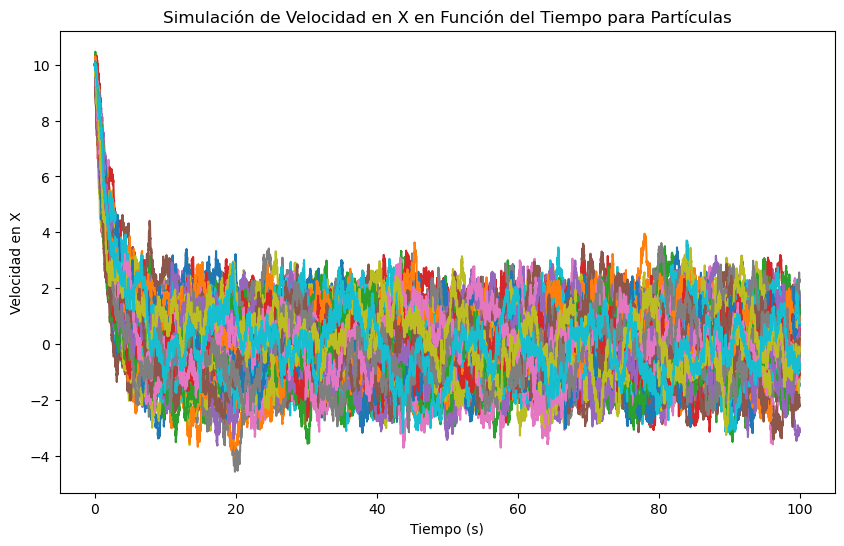

In [11]:
dt = 0.01
gamma= 0.5
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0
num_particles = 100  # Cambiado a 100 partículas
total_steps = int(100 / dt)  # Cambiado a 200 segundos

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=10, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Graficar resultados
time_values = np.arange(total_steps) * dt

# Gráfico de posición en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, positions_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en X')
plt.title('Simulación de Posición en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

# Gráfico de velocidad en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, velocities_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad en X')
plt.title('Simulación de Velocidad en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()


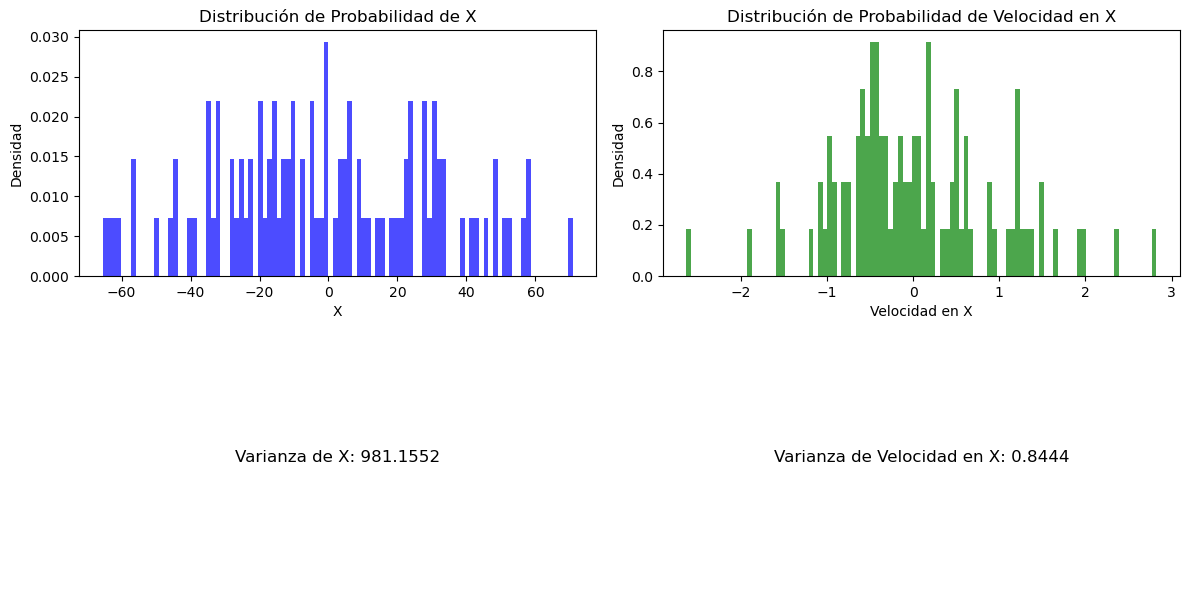

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# ... (código anterior)

# Parámetros de la simulación
dt = 0.01
gamma= 0.5
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0
num_particles = 100
total_steps = int(200 / dt)

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=0, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Calcular distribución de probabilidad de x y vx
x_values = positions_x[:, -1]  # Tomar las posiciones al final del tiempo
vx_values = velocities_x[:, -1]  # Tomar las velocidades al final del tiempo

# Calcular varianza de x y vx
variance_x = np.var(x_values)
variance_vx = np.var(vx_values)

# Graficar histogramas de x y vx
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(x_values, bins=100, density=True, alpha=0.7, color='blue')
plt.title('Distribución de Probabilidad de X')
plt.xlabel('X')
plt.ylabel('Densidad')

plt.subplot(2, 2, 2)
plt.hist(vx_values, bins=100, density=True, alpha=0.7, color='green')
plt.title('Distribución de Probabilidad de Velocidad en X')
plt.xlabel('Velocidad en X')
plt.ylabel('Densidad')

plt.subplot(2, 2, 3)
plt.text(0.5, 0.5, f'Varianza de X: {variance_x:.4f}', fontsize=12, ha='center', va='center')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.text(0.5, 0.5, f'Varianza de Velocidad en X: {variance_vx:.4f}', fontsize=12, ha='center', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


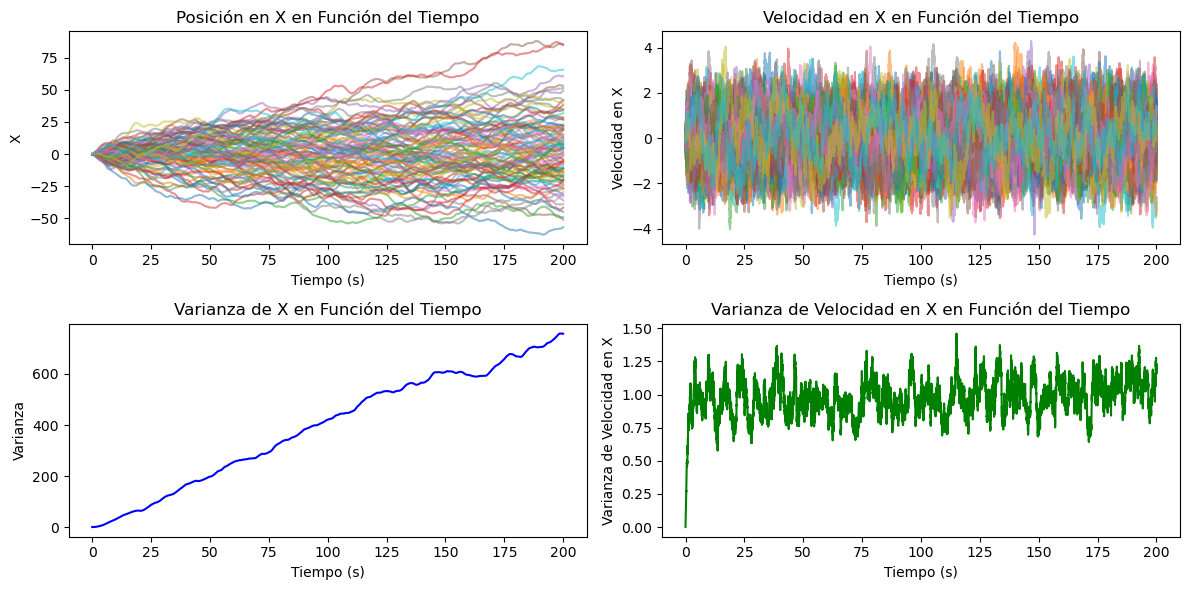

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# ... (código anterior)

dt = 0.01
gamma= 0.5
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0
num_particles = 100
total_steps = int(200 / dt)

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=0, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Calcular la varianza de x y vx para cada punto en el tiempo
variances_x = np.var(positions_x, axis=0)
variances_vx = np.var(velocities_x, axis=0)

# Graficar resultados
time_values = np.arange(total_steps) * dt

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
for i in range(num_particles):
    plt.plot(time_values, positions_x[i], alpha=0.5)
plt.title('Posición en X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('X')

plt.subplot(2, 2, 2)
for i in range(num_particles):
    plt.plot(time_values, velocities_x[i], alpha=0.5)
plt.title('Velocidad en X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad en X')

plt.subplot(2, 2, 3)
plt.plot(time_values, variances_x, color='blue')
plt.title('Varianza de X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza')

plt.subplot(2, 2, 4)
plt.plot(time_values, variances_vx, color='green')
plt.title('Varianza de Velocidad en X en Función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Varianza de Velocidad en X')

plt.tight_layout()
plt.show()


---------------------------------------------------

In [4]:
class Particle:
    def __init__(self, x, y, vx, vy, Fx=0, Fy=0, Dvx=0, Dvy=0, c_x=0, W=0):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.Fx = Fx
        self.Fy = Fy
        self.Dvx = Dvx
        self.Dvy = Dvy
        self.c_x = c_x
        self.W = W

    def reset_F(self):
        self.Fx = 0
        self.Fy = 0

    def add_F(self, Fx, Fy):
        self.Fx += Fx
        self.Fy += Fy

In [5]:
class lf_integrator:
    def __init__(self, dti, fi, Ti):
        self.dt = dti
        self.f = fi
        self.T = Ti
        self.bonded = False

    def initialize_v(self, particles):
        for p in particles:
            p.vx += 0.5 * self.dt * p.Fx
            p.vy += 0.5 * self.dt * p.Fy

    def update_F(self, particles, k):
        for p in particles:
            p.reset_F()
            F = -k * (p.x - p.c_x)
            p.add_F(F, 0)

    def update_v1(self, particles):
        for p in particles:
            p.vx += self.dt * p.Fx
            p.vy += self.dt * p.Fy

    def impulse_Dv(self, particles):
        for p in particles:
            eta = np.random.normal(0, 1)
            p.Dvx = -self.f * p.vx + math.sqrt(self.f * (2 - self.f) * self.T) * eta

    def update_x(self, particles, k):
        for p in particles:
            dx = self.dt * (p.vx + 0.5 * p.Dvx)
            dy = self.dt * (p.vy + 0.5 * p.Dvy)
            p.x += dx
            p.y += dy
            p.W += -k * (p.x - p.c_x) * dx

    def update_v2(self, particles):
        for p in particles:
            p.vx += p.Dvx
            p.vy += p.Dvy

In [ ]:
dt = 0.01
gamma= 0.5
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0
num_particles = 100  # Cambiado a 100 partículas
total_steps = int(100 / dt)  # Cambiado a 200 segundos

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=0, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Graficar resultados
time_values = np.arange(total_steps) * dt

# Gráfico de posición en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, positions_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en X')
plt.title('Simulación de Posición en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

# Gráfico de velocidad en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, velocities_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad en X')
plt.title('Simulación de Velocidad en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()


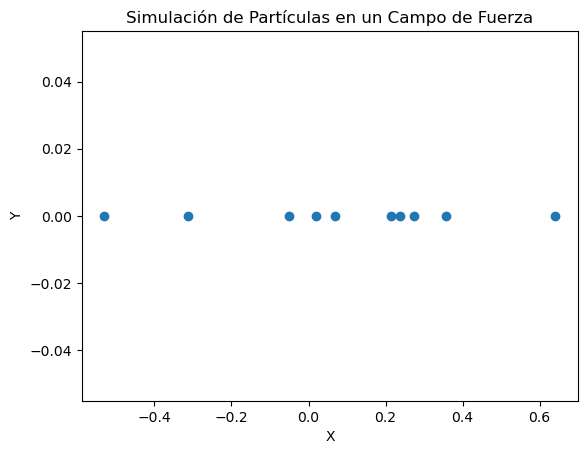

In [9]:
# Parámetros de la simulación
dt = 0.01
f = 0.1
T = 1.0
k = 0.1
num_particles = 10
total_steps = 100

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=1, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Simulación
for step in range(total_steps):
    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Graficar resultados (posiciones finales)
plt.scatter([p.x for p in particles], [p.y for p in particles])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulación de Partículas en un Campo de Fuerza')
plt.show()

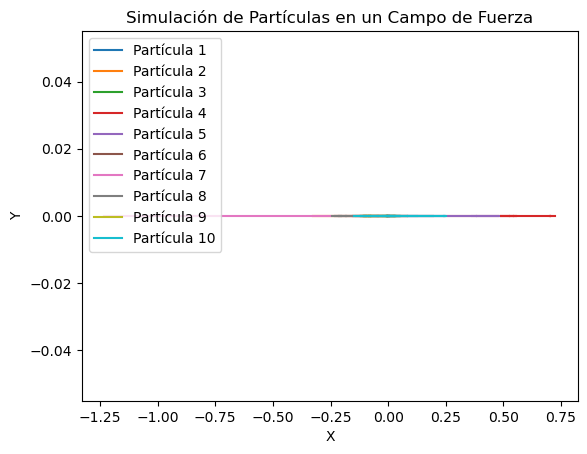

In [10]:
import matplotlib.pyplot as plt

# ... (código anterior)

# Parámetros de la simulación
dt = 0.01
f = 0.1
T = 1.0
k = 1.0
num_particles = 10
total_steps = 100

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=0, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones en cada instante de tiempo
positions_x = [[] for _ in range(num_particles)]
positions_y = [[] for _ in range(num_particles)]

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i].append(p.x)
        positions_y[i].append(p.y)

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Graficar resultados
for i in range(num_particles):
    plt.plot(positions_x[i], positions_y[i], label=f'Partícula {i + 1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulación de Partículas en un Campo de Fuerza')
plt.legend()
plt.show()


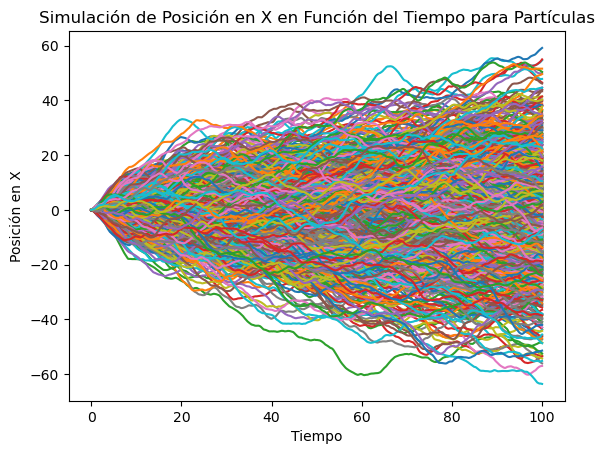

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# ... (código anterior)

# Parámetros de la simulación
dt = 0.01
gamma= 0.5
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0
num_particles = 1000
total_steps = 10000

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=0, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Graficar resultados
for i in range(num_particles):
    plt.plot(np.arange(total_steps) * dt, positions_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo')
plt.ylabel('Posición en X')
plt.title('Simulación de Posición en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()


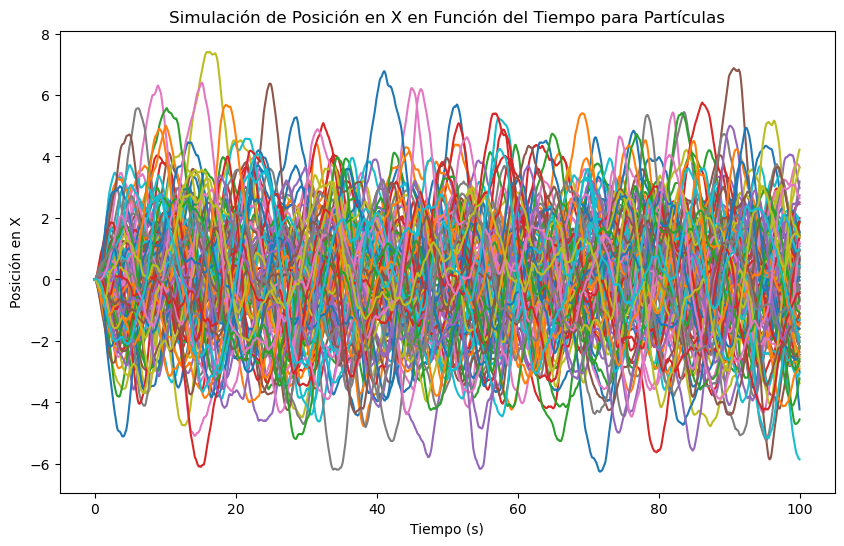

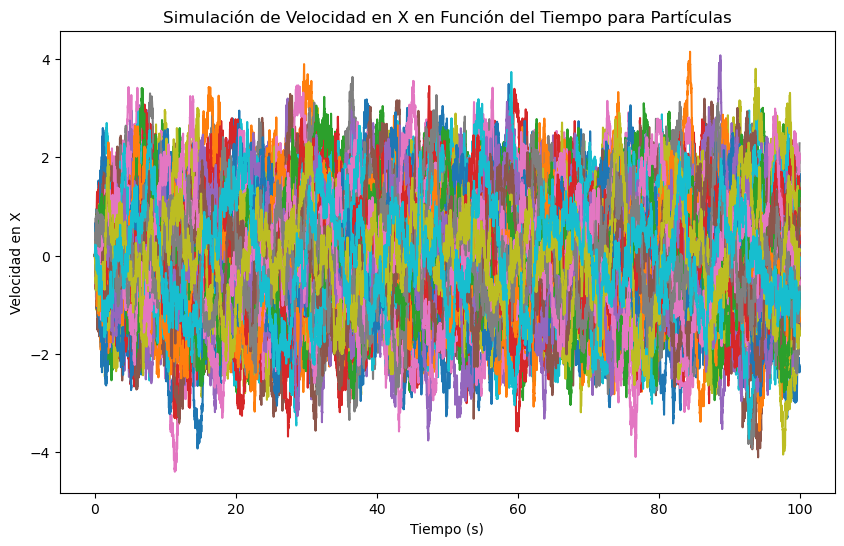

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# ... (código anterior)

# Parámetros de la simulación
dt = 0.01
gamma= 0.5
f = 1 - np.exp(-dt * gamma)
T = 1.0
k = 0.2
num_particles = 100  # Cambiado a 100 partículas
total_steps = int(100 / dt)  # Cambiado a 200 segundos

# Inicializar partículas
particles = [Particle(x=0, y=0, vx=0, vy=0) for _ in range(num_particles)]

# Inicializar el integrador Langevin
integrator = lf_integrator(dt, f, T)

# Almacenar las posiciones y velocidades en x en cada instante de tiempo
positions_x = np.zeros((num_particles, total_steps))
velocities_x = np.zeros((num_particles, total_steps))

# Simulación
for step in range(total_steps):
    for i, p in enumerate(particles):
        positions_x[i, step] = p.x
        velocities_x[i, step] = p.vx

    integrator.initialize_v(particles)
    integrator.update_F(particles, k)
    integrator.update_v1(particles)
    integrator.impulse_Dv(particles)
    integrator.update_x(particles, k)
    integrator.update_v2(particles)

# Graficar resultados
time_values = np.arange(total_steps) * dt

# Gráfico de posición en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, positions_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en X')
plt.title('Simulación de Posición en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()

# Gráfico de velocidad en x
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(time_values, velocities_x[i], label=f'Partícula {i + 1}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad en X')
plt.title('Simulación de Velocidad en X en Función del Tiempo para Partículas')
#plt.legend()
plt.show()
